In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models


# the full parameter space!

In [3]:
fixed = [False, True, True, True, True, True]

full1 = jsm_mcmc.Chain("../../../data/General_Model/mock_L1/chain.h5", fixed=fixed, Nstack=500, Nburn=200, Nthin=25)

full2 = jsm_mcmc.Chain("../../../data/General_Model/mock_L2/chain.h5", fixed=fixed, Nstack=500, Nburn=200, Nthin=25)

fullmin = jsm_mcmc.Chain("../../../data/General_Model/mock_min_mass/chain.h5", fixed=fixed, Nstack=500, Nburn=200, Nthin=25)

fullhost = jsm_mcmc.Chain("../../../data/General_Model/mock_N_host/chain.h5", fixed=fixed, Nstack=500, Nburn=200, Nthin=25)

In [4]:
#full1.plot_posteriors(nContourLevels=3, smoothingKernel=1.5, truths=[3, 0.2, -0.1, 0.03, 1.3])
#full2.plot_posteriors(nContourLevels=3, smoothingKernel=1.5, truths=[3, 0.2, -0.1, 0.03, 1.3])

### the surveys of the future!

In [17]:
data = [fullhost.clean, fullmin.clean, full2.clean]

In [18]:
chain_labels = ["$\mathrm{Mock-1000}$ \n $\\alpha = $" + fullhost.constraints[0] + "\n $\\sigma = $" + fullhost.constraints[1] + "\n $\\gamma = $" + fullhost.constraints[2] + "\n $\\beta = $" + fullhost.constraints[3] + "\n $\\tau = $" + fullhost.constraints[4],
                "$\mathrm{Mock-55}$ \n $\\alpha = $" + fullmin.constraints[0] + "\n $\\sigma = $" + fullmin.constraints[1] + "\n $\\gamma = $" + fullmin.constraints[2] + "\n $\\beta = $" + fullmin.constraints[3] + "\n $\\tau = $" + fullmin.constraints[4],
                "$\mathrm{Mock-SAGA}$ \n $\\alpha = $" + full2.constraints[0] + "\n $\\sigma = $" + full2.constraints[1] + "\n $\\gamma = $" + full2.constraints[2] + "\n $\\beta = $" + full2.constraints[3] + "\n $\\tau = $" + full2.constraints[4]]

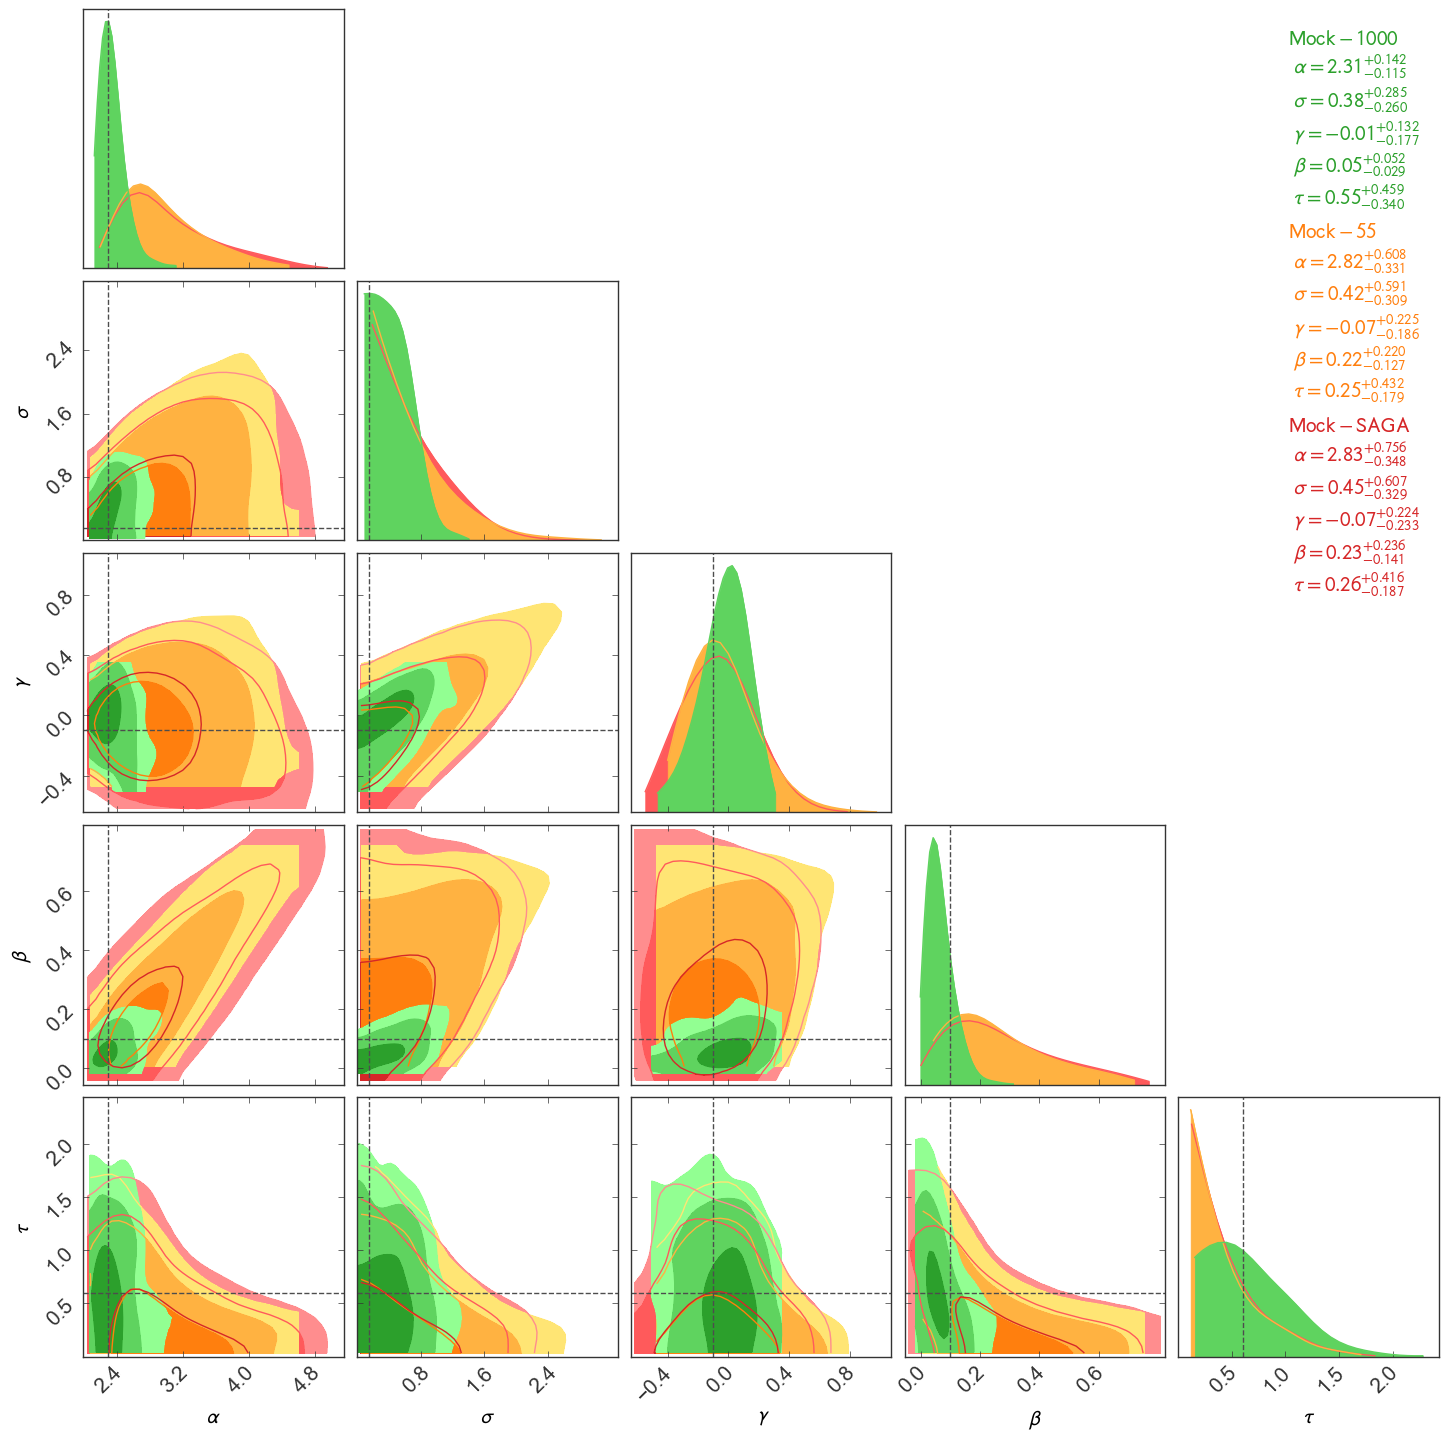

In [19]:
test = jsm_mcmc.MulitChain(data, chain_labels, fixed)
test.plot_posteriors(truths=[2.3, 0.15, -0.1, 0.1, 0.6], filledPlots=True, nContourLevels=3, smoothingKernel=2.3, colorsOrder=['greens', 'oranges', 'reds'], plotName="../../../paper_1/figures/realistic_infrence/full_corner.pdf")

In [8]:
stpop

NameError: name 'stpop' is not defined

### L1 vs L2

In [ ]:
data = [full1.clean, full2.clean]

In [ ]:
chain_labels = ["$\\alpha = $" + full1.constraints[0] + "\n $\\sigma = $" + full1.constraints[1] + "\n $\\gamma = $" + full1.constraints[2] + "\n $\\beta = $" + full1.constraints[3] + "\n $\\tau = $" + full1.constraints[4],
                "$\\alpha = $" + full2.constraints[0] + "\n $\\sigma = $" + full2.constraints[1] + "\n $\\gamma = $" + full2.constraints[2] + "\n $\\beta = $" + full2.constraints[3] + "\n $\\tau = $" + full2.constraints[4]]

In [ ]:
test = jsm_mcmc.MulitChain(data, chain_labels, fixed)
test.plot_posteriors(truths=[2.3, 0.15, -0.1, 0.1, 0.6], filledPlots=True, nContourLevels=2, smoothingKernel=1.5), #plotName="../../../paper_1/figures/alpha_corner.pdf")

### L1 vs full freedom in parameter space

In [ ]:
fixed = [False, True, True, False, False, False]

full1 = jsm_mcmc.Chain("../../../data/General_Model/mock_L1/chain.h5", fixed=fixed, Nstack=500, Nburn=200, Nthin=15)

full2 = jsm_mcmc.Chain("../../../data/General_Model/mock_L2/chain.h5", fixed=fixed, Nstack=500, Nburn=200, Nthin=15)

alpha3 = jsm_mcmc.Chain("../../mcmc/Feature_Recovery/alpha_permutations/mock_3/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

In [ ]:
data = [alpha3.clean, full1.clean, full2.clean]

chain_labels = ["$\\alpha = $" + alpha3.constraints[0] + "\n $\\sigma = $" + alpha3.constraints[1],
                "$\\alpha = $" + full1.constraints[0] + "\n $\\sigma = $" + full1.constraints[1],
                "$\\alpha = $" + full2.constraints[0] + "\n $\\sigma = $" + full2.constraints[1]]

In [ ]:
test = jsm_mcmc.MulitChain(data, chain_labels, fixed)
test.plot_posteriors(truths=[3, 0.2], filledPlots=True, nContourLevels=3, smoothingKernel=1.3), #plotName="../../../paper_1/figures/alpha_corner.pdf")

# Just a sanity check

In [ ]:
fixed = [False, True, True, False, True, False]

In [ ]:
#alpha = jsm_mcmc.Chain("../../mcmc/Feature_Recovery/alpha_permutations/mock_2/chain.h5", fixed=fixed, Nstack=500, Nburn=150, Nthin=15)
#sigma = jsm_mcmc.Chain("../../mcmc/Feature_Recovery/sigma_permutations/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=150, Nthin=15)
beta = jsm_mcmc.Chain("../../mcmc/Feature_Recovery/beta_permutations/mock_3/chain.h5", fixed=fixed, Nstack=500, Nburn=150, Nthin=15)
test = jsm_mcmc.Chain("../../mcmc/Feature_Recovery/beta_permutations/mock_5/chain.h5", fixed=fixed, Nstack=500, Nburn=150, Nthin=15)


In [ ]:
data = [beta.clean, test.clean]

In [ ]:
test = jsm_mcmc.MulitChain(data, ["l1", "l2"], fixed)

In [ ]:
test.plot_posteriors(truths=[2.5, 0.2, 0.0], nContourLevels=2)

In [ ]:
test = np.load("../../../data/cross_host/lognorm_psi3/host_properties.npy")

plt.hist(test[2200:2300][:, 0], bins=15, edgecolor="white", color="cornflowerblue", label="L2 library")
plt.axvline(12, label="L1 library", lw=3, color="firebrick", ls="--")
plt.legend()
plt.show()